In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [77]:
d = 5
# x_stab = 9
t_x = 0
r_x = -1
# c_func = lambda t,r,a: a - (d**2-1)/4*(1+2*t) + (r-1)/2*(d+1)/2
c = 1 #c_func(t_x,r_x,x_stab)
# print(c)
q_func = lambda t,r,c,i: ((d-1)/2+r*(i+1)+1)*(t*d+(1-t)) -1 + 2*c*(d*(1-t)-t)
a_func = lambda t,r,c,i: (d**2-1)/4*(1+2*t) + ((r-1)/2+r*i)*(d+1)/2 +c 
# t = 0 for X or 1 for Z
# r rotation of alg -1 or +1 left/right for X chains, up/down for Z-chain
# 0 <= i <= (d-1)/2 - 1
# print(c, q_func(0,1,0),a_func(0,1,0))
for i in range((d-1)//2 ):
    print(q_func(t_x,r_x,c,i),a_func(t_x,r_x,c,i))


11.0 4.0
10.0 1.0


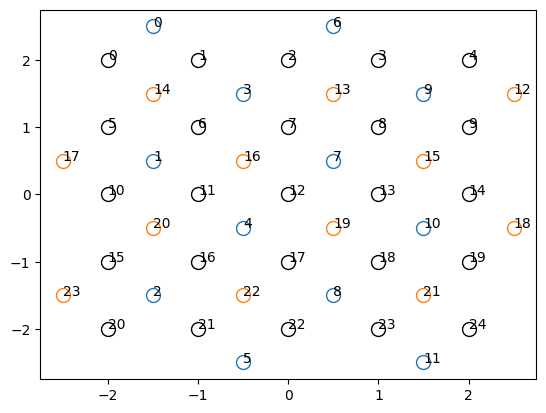

In [78]:
# for c in range():

q_list = {}
sz_list = {}
c_sz = (d**2-1)-1
for row in range(d):
    for col in range(d):
        x, y = col-(d-1)/2, row-(d-1)/2
        q_list[f"{d**2-d+col-d*row}"] = (x,y)
        plt.plot(x,y,"o",markersize=10,markerfacecolor="None",markeredgecolor="k")
        plt.text(x,y,f"{d**2-d+col-d*row}")

        # if (row + col) % 2 == 1 and row > 0:
        if row %2 ==1 and col % 2 == 0:
            x_sz, y_sz = x+0.5, y+ 0.5
            sz_list[f"{c_sz}"] = (x_sz, y_sz)
            plt.plot(x_sz,y_sz,"o",markersize=10,markerfacecolor="None",markeredgecolor="C1")
            plt.text(x_sz,y_sz,f"{c_sz}")
            c_sz -= 1
        if row %2 ==0 and col % 2 == 0 and row < d-1:
            x_sz, y_sz = x-0.5, y+ 0.5
            sz_list[f"{c_sz}"] = (x_sz, y_sz)
            plt.plot(x_sz,y_sz,"o",markersize=10,markerfacecolor="None",markeredgecolor="C1")
            plt.text(x_sz,y_sz,f"{c_sz}")
            c_sz -= 1


c_q = 0
sx_list = {}
c_sx = 0# (d**2-1)-1
for col in range(d):
    for row in range(d):
        x, y = col-(d-1)/2, (d-1)/2-row
        # plt.plot(x,y,"o",markersize=10,markerfacecolor="None",markeredgecolor="k")
        # plt.text(x,y,f"{c_q}")
        # c_q += 1
        # # if (row + col) % 2 == 1 and row > 0:
        if row %2 ==0 and col % 2 == 1:
            x_s, y_s = x+0.5, y- 0.5
            sx_list[f"{c_sx}"] = (x_s, y_s)
            plt.plot(x_s,y_s,"o",markersize=10,markerfacecolor="None",markeredgecolor="C0")
            plt.text(x_s,y_s,f"{c_sx}")
            c_sx += 1
        if row %2 ==0 and col % 2 == 0 and col < d-1:
            x_s, y_s = x+0.5, y+ 0.5
            sx_list[f"{c_sx}"] = (x_s, y_s)
            plt.plot(x_s,y_s,"o",markersize=10,markerfacecolor="None",markeredgecolor="C0")
            plt.text(x_s,y_s,f"{c_sx}")
            c_sx += 1



In [9]:
def idx_to_coord(d):
    q_list = {}
    sz_list = {}
    c_sz = (d**2-1)-1
    for row in range(d):
        for col in range(d):
            x, y = col-(d-1)/2, row-(d-1)/2
            q_list[f"{d**2-d+col-d*row}"] = (x,y)
            if row %2 ==1 and col % 2 == 0:
                x_sz, y_sz = x+0.5, y+ 0.5
                sz_list[f"{c_sz}"] = (x_sz, y_sz)
                c_sz -= 1
            if row %2 ==0 and col % 2 == 0 and row < d-1:
                x_sz, y_sz = x-0.5, y+ 0.5
                sz_list[f"{c_sz}"] = (x_sz, y_sz)
                c_sz -= 1

    c_q = 0
    sx_list = {}
    c_sx = 0# (d**2-1)-1
    for col in range(d):
        for row in range(d):
            x, y = col-(d-1)/2, (d-1)/2-row
            if row %2 ==0 and col % 2 == 1:
                x_s, y_s = x+0.5, y- 0.5
                sx_list[f"{c_sx}"] = (x_s, y_s)
                c_sx += 1
            if row %2 ==0 and col % 2 == 0 and col < d-1:
                x_s, y_s = x+0.5, y+ 0.5
                sx_list[f"{c_sx}"] = (x_s, y_s)
                c_sx += 1
    return q_list, sx_list, sz_list

def plotter(idx_list, color, marker="o"):
    for idx in (idx_list):
        # print(idx, idx_list[f"{idx}"])
        x, y = idx_list[idx]
        plt.plot(x,y,marker= marker,markersize=10,markerfacecolor="None",markeredgecolor=color)
        plt.text(x,y,idx)



In [14]:
def idx_to_coord_train(d):
    sz_list = {}
    c_sz = (d**2-1)-1
    for row in range(d):
        for col in range(d):
            x, y = col-(d-1)/2, row-(d-1)/2
            if row %2 ==1 and col % 2 == 0:
                x_sz, y_sz = x+(d-1)/2+1, y+ (d-1)/2+1
                sz_list[f"{c_sz}"] = (x_sz, y_sz)
                c_sz -= 1
            if row %2 ==0 and col % 2 == 0 and row < d-1:
                x_sz, y_sz = x +(d-1)/2, y +(d-1)/2+1
                sz_list[f"{c_sz}"] = (x_sz, y_sz)
                c_sz -= 1

    c_q = 0
    sx_list = {}
    c_sx = 0# (d**2-1)-1
    for col in range(d):
        for row in range(d):
            x, y = col-(d-1)/2, (d-1)/2-row
            if row %2 ==0 and col % 2 == 1:
                x_s, y_s = x+(d-1)/2+1, y+(d-1)/2
                sx_list[f"{c_sx}"] = (x_s, y_s)
                c_sx += 1
            if row %2 ==0 and col % 2 == 0 and col < d-1:
                x_s, y_s = x+(d-1)/2+1, y+(d-1)/2+1
                sx_list[f"{c_sx}"] = (x_s, y_s)
                c_sx += 1

    pos_x = torch.zeros(d**2-1)
    pos_y = torch.zeros(d**2-1)
    for idx in range((d**2-1)//2):
        pos_x[idx]= sx_list[f"{idx}"][0]
        pos_y[idx]= sx_list[f"{idx}"][1]

    for idx in range((d**2-1)//2,d**2-1):
        pos_x[idx]= sz_list[f"{idx}"][0]
        pos_y[idx]= sz_list[f"{idx}"][1]

    return pos_x, pos_y


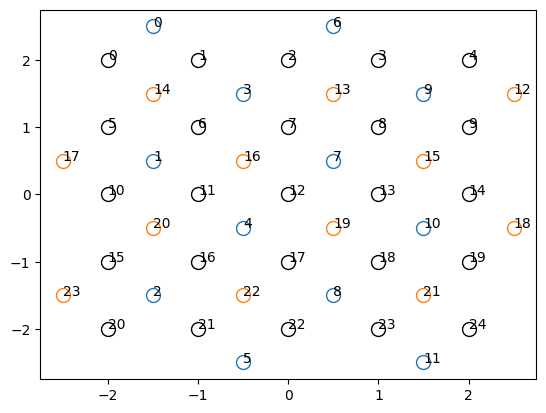

In [82]:
d = 5
q_list, sx_list, sz_list = idx_to_coord(d)
plotter(q_list,"k")
plotter(sx_list,"C0")
plotter(sz_list,"C1")
# plotter(sz_list)


In [19]:
import torch
pos_x = torch.zeros(d**2-1)
pos_y = torch.zeros(d**2-1)
for idx in range((d**2-1)//2):
    pos_x[idx]= sx_list[f"{idx}"][0]
    pos_y[idx]= sx_list[f"{idx}"][1]

for idx in range((d**2-1)//2,d**2-1):
    pos_x[idx]= sz_list[f"{idx}"][0]
    pos_y[idx]= sz_list[f"{idx}"][1]

print(pos_x)
print(pos_y)


tensor([1., 1., 1., 2., 2., 2., 3., 3., 3., 4., 4., 4., 5., 3., 1., 4., 2., 0.,
        5., 3., 1., 4., 2., 0.])
tensor([5., 3., 1., 4., 2., 0., 5., 3., 1., 4., 2., 0., 4., 4., 4., 3., 3., 3.,
        2., 2., 2., 1., 1., 1.])


In [83]:
# d = 5
c_list = np.arange((d+1)//2)
q_func = lambda t,r,c,i: int(((d-1)/2+r*(i+1)+1)*(t*d+(1-t)) -1 + 2*c*(d*(1-t)-t))
a_func = lambda t,r,c,i: int((d**2-1)/4*(1+2*t) + ((r-1)/2+r*i)*(d+1)/2 +c )

x_stab_to_c = np.zeros((d**2-1)//2,dtype=int)
t = 0
for r in [-1,1]:
    for c in c_list:
        for i in range((d-1)//2 ):
            x_stab_to_c[a_func(t,r,c,i)] = c

z_stab_to_c = np.zeros((d**2-1)//2,dtype=int)
t = 1
for r in [-1,1]:
    for c in c_list:
        for i in range((d-1)//2 ):
            z_stab_to_c[a_func(t,r,c,i)-(d**2-1)//2] = c
            
def decoder(syndrome, x_or_z):
    recovery = np.zeros(d**2)
    trc_list = []
    if x_or_z == "x":
        t = 0
        for s in syndrome:
            c = x_stab_to_c[s]
            r = -1 if s< (d**2-1)//4 else 1
            trc_list.append((t,r,c))

        trc_list = list(set(trc_list))
        # print(trc_list)

        for t,r,c in trc_list:
            i = 0
            recovery[q_func(t,r,c,i)] += (a_func(t,r,c,i) in syndrome)
            for i in range(1,(d-1)//2 ):
                recovery[q_func(t,r,c,i)] += (a_func(t,r,c,i) in syndrome) + recovery[q_func(t,r,c,i-1)]

    else:
        t = 1
        for s in syndrome:
            c = z_stab_to_c[s-(d**2-1)//2]
            # r = -1 if s< (d**2-1)//4 else 1
            r = -1 if sz_list[f"{s}"][1]> 0 else 1
            trc_list.append((t,r,c))

        trc_list = list(set(trc_list))
        # print(trc_list)

        for t,r,c in trc_list:
            i = 0
            recovery[q_func(t,r,c,i)] += (a_func(t,r,c,i) in syndrome)
            for i in range(1,(d-1)//2 ):
                recovery[q_func(t,r,c,i)] += (a_func(t,r,c,i) in syndrome) + recovery[q_func(t,r,c,i-1)]


    recovery %= 2 
    return np.argwhere(recovery>0)[:,0]


In [84]:

def decoder(d, syndrome):

    syndrome_x = syndrome[np.argwhere(syndrome< (d**2-1)//2)[:,0]]
    syndrome_z = syndrome[np.argwhere(syndrome>= (d**2-1)//2)[:,0]]
    
    t = 0
    recovery_x = np.zeros(d**2)
    trc_list = []
    for s in syndrome_x:
        c = x_stab_to_c[s]
        r = -1 if s< (d**2-1)//4 else 1
        trc_list.append((t,r,c))

    trc_list = list(set(trc_list))
    for t,r,c in trc_list:
        i = 0
        recovery_x[q_func(t,r,c,i)] += (a_func(t,r,c,i) in syndrome_x)
        for i in range(1,(d-1)//2 ):
            recovery_x[q_func(t,r,c,i)] += (a_func(t,r,c,i) in syndrome_x) + recovery_x[q_func(t,r,c,i-1)]
    recovery_x %= 2 

    t = 1
    recovery_z = np.zeros(d**2)
    trc_list = []
    for s in syndrome_z:
        c = z_stab_to_c[s-(d**2-1)//2]
        # r = -1 if s< (d**2-1)//4 else 1
        r = -1 if sz_list[f"{s}"][1]> 0 else 1
        trc_list.append((t,r,c))

    trc_list = list(set(trc_list))
    for t,r,c in trc_list:
        i = 0
        recovery_z[q_func(t,r,c,i)] += (a_func(t,r,c,i) in syndrome_z)
        for i in range(1,(d-1)//2 ):
            recovery_z[q_func(t,r,c,i)] += (a_func(t,r,c,i) in syndrome_z) + recovery_z[q_func(t,r,c,i-1)]
    recovery_z %= 2 


    return np.argwhere(recovery_x>0)[:,0], np.argwhere(recovery_z>0)[:,0]

[4 6 1] [37 36]


KeyError: '37'

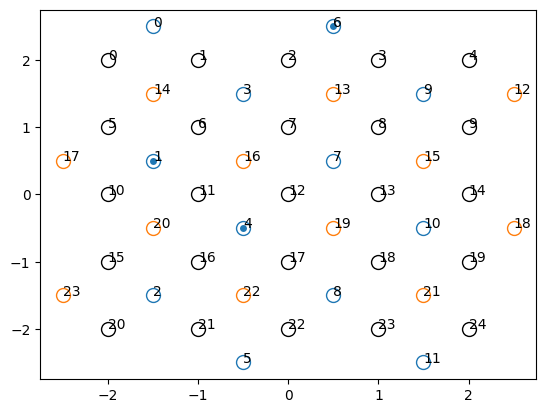

In [85]:
d = 5
c_list = np.arange((d+1)//2)
q_func = lambda t,r,c,i: int(((d-1)/2+r*(i+1)+1)*(t*d+(1-t)) -1 + 2*c*(d*(1-t)-t))
a_func = lambda t,r,c,i: int((d**2-1)/4*(1+2*t) + ((r-1)/2+r*i)*(d+1)/2 +c )

x_stab_to_c = np.zeros((d**2-1)//2,dtype=int)
t = 0
for r in [-1,1]:
    for c in c_list:
        for i in range((d-1)//2 ):
            x_stab_to_c[a_func(t,r,c,i)] = c

z_stab_to_c = np.zeros((d**2-1)//2,dtype=int)
t = 1
for r in [-1,1]:
    for c in c_list:
        for i in range((d-1)//2 ):
            z_stab_to_c[a_func(t,r,c,i)-(d**2-1)//2] = c

q_list, sx_list, sz_list = idx_to_coord(d)
plotter(q_list,color="k")
plotter(sx_list,color="C0")
plotter(sz_list,color="C1")


# syndrome_x_orig = (Sx@error_z_orig) % 2
# synd_x_inds = np.argwhere(syndrome_x_orig > 0)

syndrome = np.array([4,6,1,37,36])
syndrome_x = syndrome[np.argwhere(syndrome< (d**2-1)//2)[:,0]]
syndrome_z = syndrome[np.argwhere(syndrome>= (d**2-1)//2)[:,0]]
print(syndrome_x,syndrome_z)
for s in syndrome_x:
    x,y = sx_list[f"{s}"]
    plt.plot(x,y,"o",markerfacecolor="C0",markeredgecolor="None",markersize=5)

for s in syndrome_z:
    x,y = sz_list[f"{s}"]
    plt.plot(x,y,"o",markerfacecolor="C1",markeredgecolor="None",markersize=5)

recovery_x, recovery_z = decoder(d, syndrome)
print(recovery_x, recovery_z)
for qubit in recovery_x:
    x,y = q_list[f"{qubit}"]
    plt.text(x-0.1,y-0.1,"z",fontsize=12, color="red")

for qubit in recovery_z:
    x,y = q_list[f"{qubit}"]
    plt.text(x-0.1,y-0.1,"x",fontsize=12, color="green")

# err_rec = np.zeros(2*d**2)
# err_rec 
# for q in recovery_x:
#     err_rec[q] += 
# # error_rec = (rec2 + error_z )%2
# s_h = np.dot( error_rec , logical_h[remain_qubits].T) %2 


[0 0 0 0 0 0 0 3 0 0 0 1 0 2 0 1 1 0 0 3 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0.] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0.]
[ 3 13 18 20 21 22 23]
[0 1] [ 2 15 19 22]
[1. 1.]


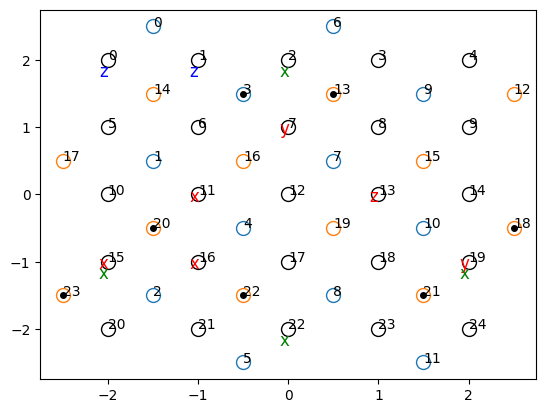

In [86]:
d = 5
c_list = np.arange((d+1)//2)
q_func = lambda t,r,c,i: int(((d-1)/2+r*(i+1)+1)*(t*d+(1-t)) -1 + 2*c*(d*(1-t)-t))
a_func = lambda t,r,c,i: int((d**2-1)/4*(1+2*t) + ((r-1)/2+r*i)*(d+1)/2 +c )

x_stab_to_c = np.zeros((d**2-1)//2,dtype=int)
t = 0
for r in [-1,1]:
    for c in c_list:
        for i in range((d-1)//2 ):
            x_stab_to_c[a_func(t,r,c,i)] = c

z_stab_to_c = np.zeros((d**2-1)//2,dtype=int)
t = 1
for r in [-1,1]:
    for c in c_list:
        for i in range((d-1)//2 ):
            z_stab_to_c[a_func(t,r,c,i)-(d**2-1)//2] = c

q_list, sx_list, sz_list = idx_to_coord(d)
plotter(q_list,color="k")
plotter(sx_list,color="C0")
plotter(sz_list,color="C1")

s_mat = np.zeros(((d**2-1), 2*d**2))
for sx in sx_list:
    r_sx = sx_list[sx]
    for q in q_list:
        r_q = q_list[q]
        if (r_q[0]-r_sx[0])**2+(r_q[1]-r_sx[1])**2 < 1:
            # print(sx,q)
            s_mat[int(sx),int(q)] = 1

# sz_mat = np.zeros(((d**2-1)//2, d**2))
for sz in sz_list:
    r_sz = sz_list[sz]
    for q in q_list:
        r_q = q_list[q]
        if (r_q[0]-r_sz[0])**2+(r_q[1]-r_sz[1])**2 < 1:
            # print(sx,q)
            s_mat[int(sz),d**2+ int(q)] = 1

logicals = np.zeros((2,2*d**2))
logicals[0,np.arange(0,d**2,d)]= 1 # x logical
logicals[1,d**2+np.arange(d**2-d, d**2)]= 1 # z logical
# print(sx_mat)
# print(s_mat)
# print(s_mat[(d**2-1)//2:, d**2:])

p_err = 0.2
pauli = [0,1,2,3] # I X Z Y
err_instance = np.array(random.choices(pauli, [1-p_err,p_err/3,p_err/3,p_err/3], k=d**2))
x_err = np.argwhere(err_instance==1)[:,0]
z_err = np.argwhere(err_instance==2)[:,0]
y_err = np.argwhere(err_instance==3)[:,0]

for qubit in x_err:
    x,y = q_list[f"{qubit}"]
    plt.text(x-0.1,y-0.1,"x",fontsize=12, color="red")

for qubit in z_err:
    x,y = q_list[f"{qubit}"]
    plt.text(x-0.1,y-0.1,"z",fontsize=12, color="red")

for qubit in y_err:
    x,y = q_list[f"{qubit}"]
    plt.text(x-0.1,y-0.1,"y",fontsize=12, color="red")

print(err_instance)
# err_instance = np.random.rand(d**2)
err_vec = np.zeros(2*d**2)
err_vec[x_err] = 1
err_vec[d**2 + z_err] = 1
err_vec[y_err] = 1
err_vec[d**2 + y_err] = 1

comm_mat = np.kron([[0,1],[1,0]],np.eye(d**2))
print(err_vec[:d**2],err_vec[d**2:])
# err_vec = np.zeros(2*d**2)
syndrome = (s_mat@ (comm_mat @err_vec)) % 2
# # synd_x_inds = np.argwhere(syndrome_x_orig > 0)
print(np.argwhere(syndrome>0)[:,0])
active_syndrome_idx = np.argwhere(syndrome>0)[:,0]

s_list = sx_list | sz_list
for idx in (active_syndrome_idx):
    x, y = s_list[f"{idx}"]
    plt.plot(x,y,"ko",markersize=4,markerfacecolor="black")
#     # plt.text(x,y,idx)

recovery_x, recovery_z = decoder(d, active_syndrome_idx)
print(recovery_x, recovery_z)
for qubit in recovery_x:
    x,y = q_list[f"{qubit}"]
    plt.text(x-0.1,y-0.25,"z",fontsize=12, color="blue")

for qubit in recovery_z:
    x,y = q_list[f"{qubit}"]
    plt.text(x-0.1,y-0.25,"x",fontsize=12, color="green")

err_rec = np.copy(err_vec)
err_rec[recovery_z] += 1
err_rec[d**2 + recovery_x] += 1
err_rec %= 2

logical_err = logicals@ (comm_mat @ err_rec) % 2
print(logical_err)

In [8]:
print(err_vec[:d**2],err_vec[d**2:])
print(err_rec[:d**2],err_rec[d**2:])

[0. 0. 0. 0. 0. 0. 1. 1. 0.] [0. 0. 0. 0. 0. 1. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 1. 0.] [0. 0. 0. 0. 0. 1. 0. 0. 1.]


## logical err vs. physical err.

In [14]:

d_list = np.arange(3,10,2)
N_p = 11
Niter = 10000
# p_err_list = np.linspace(0.01,0.2,N_p)
p_err_list = np.logspace(-4,-1,N_p)
logical_err_list = np.zeros((N_p,d_list.shape[0], Niter,2))

for i_d, d in enumerate(d_list):
    print(d,end="\r")
    c_list = np.arange((d+1)//2)
    q_func = lambda t,r,c,i: int(((d-1)/2+r*(i+1)+1)*(t*d+(1-t)) -1 + 2*c*(d*(1-t)-t))
    a_func = lambda t,r,c,i: int((d**2-1)/4*(1+2*t) + ((r-1)/2+r*i)*(d+1)/2 +c )

    x_stab_to_c = np.zeros((d**2-1)//2,dtype=int)
    t = 0
    for r in [-1,1]:
        for c in c_list:
            for i in range((d-1)//2 ):
                x_stab_to_c[a_func(t,r,c,i)] = c

    z_stab_to_c = np.zeros((d**2-1)//2,dtype=int)
    t = 1
    for r in [-1,1]:
        for c in c_list:
            for i in range((d-1)//2 ):
                z_stab_to_c[a_func(t,r,c,i)-(d**2-1)//2] = c

    q_list, sx_list, sz_list = idx_to_coord(d)

    s_mat = np.zeros(((d**2-1), 2*d**2))
    for sx in sx_list:
        r_sx = sx_list[sx]
        for q in q_list:
            r_q = q_list[q]
            if (r_q[0]-r_sx[0])**2+(r_q[1]-r_sx[1])**2 < 1:
                # print(sx,q)
                s_mat[int(sx),int(q)] = 1

    # sz_mat = np.zeros(((d**2-1)//2, d**2))
    for sz in sz_list:
        r_sz = sz_list[sz]
        for q in q_list:
            r_q = q_list[q]
            if (r_q[0]-r_sz[0])**2+(r_q[1]-r_sz[1])**2 < 1:
                # print(sx,q)
                s_mat[int(sz),d**2+ int(q)] = 1

    logicals = np.zeros((2,2*d**2))
    logicals[0,np.arange(0,d**2,d)]= 1 # x logical
    logicals[1,d**2+np.arange(d**2-d, d**2)]= 1 # z logical
    comm_mat = np.kron([[0,1],[1,0]],np.eye(d**2))

    pauli = [0,1,2,3] # I X Z Y
    for i_p, p_err in enumerate(p_err_list):
        for iter in range(Niter):
            err_instance = np.array(random.choices(pauli, [1-p_err,p_err/3,p_err/3,p_err/3], k=d**2))
            x_err = np.argwhere(err_instance==1)[:,0]
            z_err = np.argwhere(err_instance==2)[:,0]
            y_err = np.argwhere(err_instance==3)[:,0]

            err_vec = np.zeros(2*d**2)
            err_vec[x_err] = 1
            err_vec[d**2 + z_err] = 1
            err_vec[y_err] = 1
            err_vec[d**2 + y_err] = 1

            syndrome = (s_mat@ (comm_mat @err_vec)) % 2
            active_syndrome_idx = np.argwhere(syndrome>0)[:,0]

            recovery_x, recovery_z = decoder(d, active_syndrome_idx)

            err_rec = np.copy(err_vec)
            err_rec[recovery_z] += 1
            err_rec[d**2 + recovery_x] += 1
            err_rec %= 2

            logical_err_list[i_p,i_d,iter,:] = logicals@ (comm_mat @ err_rec) % 2



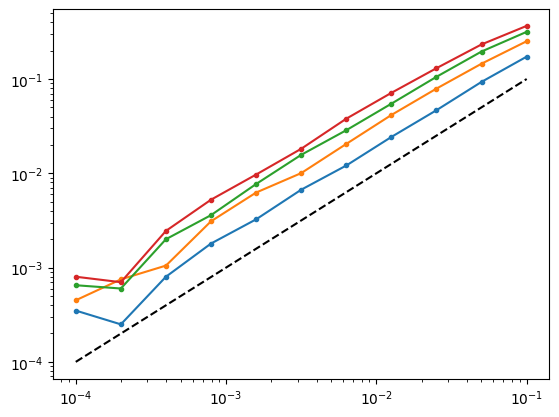

In [16]:
plt.plot(p_err_list, logical_err_list.mean(axis=(2,3)), ".-")
plt.plot(p_err_list, p_err_list, "k--")
plt.xscale("log")
plt.yscale("log")


In [75]:
import pymatching
from code_utils import code_initialization, idx_to_coord

# d = 3
# q_list, sx_list, sz_list = idx_to_coord(d)
plotter(q_list,color="k")
plotter(sx_list,color="C0")
plotter(sz_list,color="C1")

stab_matrices, s_mat, logicals = code_initialization(d)
x_stab_to_c,z_stab_to_c,sx_list,sz_list = stab_matrices
# p_err = 0.15

weights = np.ones(d**2) * np.log((1-p_err)/p_err)
ind = (d**2-1)//2
matching_x = pymatching.Matching(s_mat[:ind,:d**2],spacelike_weights=weights)
matching_z = pymatching.Matching(s_mat[ind:,d**2:],spacelike_weights=weights)

# pauli = [0,1,2,3] # I X Z Y
# err_instance = np.array(random.choices(pauli, [1-p_err,p_err/3,p_err/3,p_err/3], k=d**2))
# x_err = np.argwhere(err_instance==1)[:,0]
# z_err = np.argwhere(err_instance==2)[:,0]
# y_err = np.argwhere(err_instance==3)[:,0]

for qubit in x_err:
    x,y = q_list[f"{qubit}"]
    plt.text(x-0.1,y-0.1,"x",fontsize=12, color="red")

for qubit in z_err:
    x,y = q_list[f"{qubit}"]
    plt.text(x-0.1,y-0.1,"z",fontsize=12, color="red")

for qubit in y_err:
    x,y = q_list[f"{qubit}"]
    plt.text(x-0.1,y-0.1,"y",fontsize=12, color="red")

print(err_instance)
err_vec = np.zeros(2*d**2)
err_vec[x_err] = 1
err_vec[d**2 + z_err] = 1
err_vec[y_err] = 1
err_vec[d**2 + y_err] = 1

comm_mat = np.kron([[0,1],[1,0]],np.eye(d**2))
# print(err_vec[:d**2],err_vec[d**2:])
# err_vec = np.zeros(2*d**2)
syndrome = (s_mat@ (comm_mat @err_vec)) % 2
# # synd_x_inds = np.argwhere(syndrome_x_orig > 0)
# print(np.argwhere(syndrome>0)[:,0])
active_syndrome_idx = np.argwhere(syndrome>0)[:,0]
s_list = sx_list | sz_list
for idx in (active_syndrome_idx):
    x, y = s_list[f"{idx}"]
    plt.plot(x,y,"ko",markersize=4,markerfacecolor="black")

syndrome_x = syndrome[:ind]
syndrome_z = syndrome[ind:]

# recovery_x, recovery_z = decoder(d, active_syndrome_idx)
recovery_x = matching_x.decode(syndrome_x)
recovery_z = matching_z.decode(syndrome_z)
# print(recovery[:d**2])
# print(recovery[d**2:])
# print(recovery_x)
for qubit, err_val in enumerate(recovery_x):
    if err_val>0:
        x,y = q_list[f"{qubit}"]
        plt.text(x-0.1,y-0.25,"z",fontsize=12, color="blue")

for qubit, err_val in enumerate(recovery_z):
    if err_val>0:
        x,y = q_list[f"{qubit}"]
        plt.text(x-0.1,y-0.25,"x",fontsize=12, color="green")

idx_recovery_z = np.argwhere(recovery_z>0)[:,0]
idx_recovery_x = np.argwhere(recovery_x>0)[:,0]

err_rec = np.copy(err_vec)
err_rec[idx_recovery_z] += 1
err_rec[d**2 + idx_recovery_x] += 1
err_rec %= 2

logical_err = logicals@ (comm_mat @ err_rec) % 2
print(logical_err)

NameError: name 'q_list' is not defined

In [85]:
print(err_vec)
print(err_rec)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
import pymatching
from code_utils import code_initialization, idx_to_coord
from datasets import load_dataset
import json

p_err = 0.1
d_list = [3]
p_err_list = np.arange(0.01,0.31,0.01)
logical_err = np.zeros((p_err_list.shape[0],len(d_list)))
for i_d, d in enumerate(d_list):
    data_list = {}
    JSON_PATH = f"results/mwpm_sweep_d_{d}.json"
    data_list["p_err"] = p_err_list.tolist()
    

    q_list, sx_list, sz_list = idx_to_coord(d)
    stab_matrices, s_mat, logicals = code_initialization(d)
    x_stab_to_c,z_stab_to_c,sx_list,sz_list = stab_matrices
    weights = np.ones(d**2) * np.log((1-p_err)/p_err)
    ind = (d**2-1)//2
    matching_x = pymatching.Matching(s_mat[:ind,:d**2],spacelike_weights=weights)
    matching_z = pymatching.Matching(s_mat[ind:,d**2:],spacelike_weights=weights)

    for i_p, p_err in enumerate(p_err_list):
        dataset = load_dataset("json", data_files={
                'test' : f"datasets/test_d_{d}_p_{p_err:.2f}.json"
            })
        err_list = dataset["test"]["errors"]
        # print(err_list)
        for i in range(len(err_list)):
            x_err = err_list[i]['x']
            z_err = err_list[i]['y']
            y_err = err_list[i]['z']
            # print(z_err)
            # print(err_instance)
            err_vec = np.zeros(2*d**2)
            if len(x_err)> 0:
                err_vec[x_err] = 1
            if len(z_err)> 0:
                err_vec[d**2 + np.array(z_err)] = 1
            if len(y_err)> 0:
                err_vec[y_err] = 1
                err_vec[d**2 + np.array(y_err)] = 1

            comm_mat = np.kron([[0,1],[1,0]],np.eye(d**2))
            syndrome = (s_mat@ (comm_mat @err_vec)) % 2
            active_syndrome_idx = np.argwhere(syndrome>0)[:,0]

            syndrome_x = syndrome[:ind]
            syndrome_z = syndrome[ind:]

            recovery_x = matching_x.decode(syndrome_x)
            recovery_z = matching_z.decode(syndrome_z)

            idx_recovery_z = np.argwhere(recovery_z>0)[:,0]
            idx_recovery_x = np.argwhere(recovery_x>0)[:,0]

            err_rec = np.copy(err_vec)
            err_rec[idx_recovery_z] += 1
            err_rec[d**2 + idx_recovery_x] += 1
            err_rec %= 2

            logical_err[i_p,i_d] += np.sum(logicals@ (comm_mat @ err_rec) % 2)>0

        logical_err[i_p,i_d] /= len(err_list)
    data_list["logical_err"] = logical_err[:,i_d].tolist()
    with open(JSON_PATH, 'w') as json_file:
        json_file.write(json.dumps(data_list) + '\n')

# print(logical_err)

Generating test split: 1000 examples [00:00, 217614.61 examples/s]
Generating test split: 1000 examples [00:00, 258668.15 examples/s]
Generating test split: 1000 examples [00:00, 317365.62 examples/s]
Generating test split: 1000 examples [00:00, 306310.09 examples/s]
Generating test split: 1000 examples [00:00, 307275.02 examples/s]
Generating test split: 1000 examples [00:00, 267510.94 examples/s]
Generating test split: 1000 examples [00:00, 299037.79 examples/s]
Generating test split: 1000 examples [00:00, 312774.35 examples/s]
Generating test split: 1000 examples [00:00, 310551.16 examples/s]
Generating test split: 1000 examples [00:00, 309977.39 examples/s]
Generating test split: 1000 examples [00:00, 312867.67 examples/s]
Generating test split: 1000 examples [00:00, 311103.99 examples/s]
Generating test split: 1000 examples [00:00, 302270.39 examples/s]
Generating test split: 1000 examples [00:00, 289761.93 examples/s]
Generating test split: 1000 examples [00:00, 288228.70 example

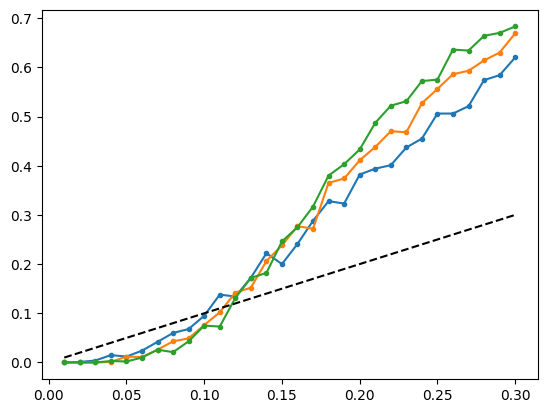

In [107]:
def mwpm_file_reader(d):
    fname = f"results/mwpm_sweep_d_{d}.json"
    f = open(fname)
    data = json.load(f)
    f.close()
    return data['p_err'], data['logical_err']

for d in d_list:
    p_err_list,logical_err = mwpm_file_reader(d)
    plt.plot(p_err_list,logical_err,".-")

plt.plot(p_err_list,p_err_list,"k--")


In [58]:
from datasets import load_dataset
dataset = load_dataset("json", data_files={
        'test' : f"datasets/test_d_{d}_p_{p_err:.2f}.json"
    })
# data_loader_test = DataLoader(dataset["test"], batch_size=BATCH_SIZE, collate_fn=collate_fn)

err_list = dataset["test"]["errors"]
print(err_list)
for i in range(len(err_list)):
    x_err = err_list[i]['x']
    z_err = err_list[i]['y']
    y_err = err_list[i]['z']


[{'x': [20], 'z': [], 'y': [15]}, {'x': [2], 'z': [], 'y': [13]}, {'x': [13], 'z': [23], 'y': []}, {'x': [8], 'z': [4], 'y': []}, {'x': [], 'z': [2, 24], 'y': [4]}, {'x': [], 'z': [16], 'y': []}, {'x': [], 'z': [14], 'y': [0, 11, 18]}, {'x': [], 'z': [], 'y': []}, {'x': [], 'z': [19], 'y': [11]}, {'x': [21], 'z': [11, 16, 20], 'y': [24]}, {'x': [], 'z': [7, 20], 'y': []}, {'x': [17, 24], 'z': [14], 'y': []}, {'x': [0], 'z': [], 'y': [5]}, {'x': [6], 'z': [], 'y': [18, 24]}, {'x': [17], 'z': [], 'y': [4]}, {'x': [14], 'z': [], 'y': [17]}, {'x': [], 'z': [], 'y': []}, {'x': [3, 6], 'z': [], 'y': []}, {'x': [], 'z': [8, 17], 'y': [0]}, {'x': [16], 'z': [13], 'y': [22]}, {'x': [], 'z': [3], 'y': [21]}, {'x': [21], 'z': [5, 13], 'y': [19]}, {'x': [3, 10], 'z': [20], 'y': []}, {'x': [], 'z': [21], 'y': []}, {'x': [], 'z': [], 'y': []}, {'x': [14], 'z': [], 'y': []}, {'x': [9, 18], 'z': [], 'y': []}, {'x': [7], 'z': [], 'y': [5, 8, 15, 19]}, {'x': [], 'z': [20], 'y': []}, {'x': [12], 'z': [],

In [57]:
len(err_list)

1000

## reordering stabilizers

In [52]:
def idx_to_coord_train(d):
    q_list = {}
    sz_list = {}
    c_sz = (d**2-1)-1
    for row in range(d):
        for col in range(d):
            x, y = col-(d-1)/2, row-(d-1)/2
            q_list[f"{d**2-d+col-d*row}"] = (x,y)
            if row %2 ==1 and col % 2 == 0:
                x_sz, y_sz = x+0.5, y+ 0.5
                sz_list[f"{c_sz}"] = (x_sz, y_sz)
                c_sz -= 1
            if row %2 ==0 and col % 2 == 0 and row < d-1:
                x_sz, y_sz = x-0.5, y+ 0.5
                sz_list[f"{c_sz}"] = (x_sz, y_sz)
                c_sz -= 1

    c_q = 0
    sx_list = {}
    c_sx = 0# (d**2-1)-1
    for col in range(d):
        for row in range(d):
            x, y = col-(d-1)/2, (d-1)/2-row
            if row %2 ==0 and col % 2 == 1:
                x_s, y_s = x+0.5, y- 0.5
                sx_list[f"{c_sx}"] = (x_s, y_s)
                c_sx += 1
            if row %2 ==0 and col % 2 == 0 and col < d-1:
                x_s, y_s = x+0.5, y+ 0.5
                sx_list[f"{c_sx}"] = (x_s, y_s)
                c_sx += 1

    # pos_x = torch.zeros(d**2-1)
    # pos_y = torch.zeros(d**2-1)
    # for idx in range((d**2-1)//2):
    #     pos_x[idx]= sx_list[f"{idx}"][0]
    #     pos_y[idx]= sx_list[f"{idx}"][1]

    # for idx in range((d**2-1)//2,d**2-1):
    #     pos_x[idx]= sz_list[f"{idx}"][0]
    #     pos_y[idx]= sz_list[f"{idx}"][1]
        
    return q_list, sx_list, sz_list


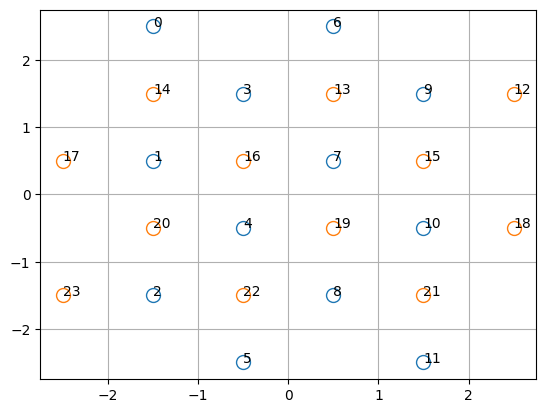

In [25]:
d = 5
_, sx_list, sz_list = idx_to_coord_train(d)
# plotter(q_list,"k")
plotter(sx_list,"C0")
plotter(sz_list,"C1")
# plotter(sz_list)
plt.grid()


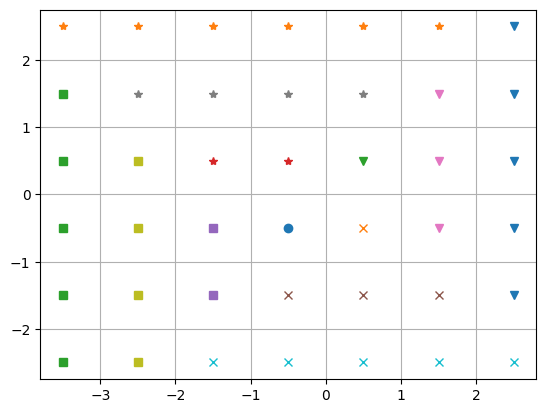

In [67]:
max_n = 6

spiral = {}
counter = 0
x0 = -0.5
y0 = -0.5
spiral[(x0,y0)] = counter 
counter += 1
plt.plot(x0,y0,"o")
for i in range(1, max_n, 2):
    x1 = x0+ i
    for x_coord in np.arange(x0+1,x1+1):
        spiral[(x_coord,y0)] = counter
        counter += 1
        
    plt.plot(np.arange(x0+1,x1+1),y0+0*np.arange(x0+1,x1+1),"x")
    x0 = x1

    y1 = y0+ i
    for y_coord in np.arange(y0+1,y1+1):
        spiral[(x0,y_coord)] = counter
        counter += 1
    plt.plot(x0+0*np.arange(y0+1,y1+1),np.arange(y0+1,y1+1),"v")
    y0 = y1

    x1 -= i+1
    for x_coord in np.arange(x0-1,x1-1,-1):
        spiral[(x_coord,y0)] = counter
        counter += 1
    plt.plot(np.arange(x1,x0),y0+0*np.arange(x1,x0),"*")
    x0 = x1

    if i < max_n-1:
        y1 -= i+1
    else:
        y1 -= i       
    for y_coord in np.arange(y0-1,y1-1,-1):
        spiral[(x0,y_coord)] = counter
        counter += 1

    plt.plot(x0 + 0*np.arange(y1,y0),np.arange(y1,y0),"s")
    y0 = y1
    
x_lim = 2
# plt.xlim(-x_lim,x_lim)
# plt.ylim(-x_lim,x_lim)
plt.grid()


tensor([34,  4,  6, 14,  0, 22, 32,  2,  8, 12, 10, 24, 29, 13, 15, 11,  3, 17,
        27,  1,  5,  9,  7, 19], dtype=torch.int32)


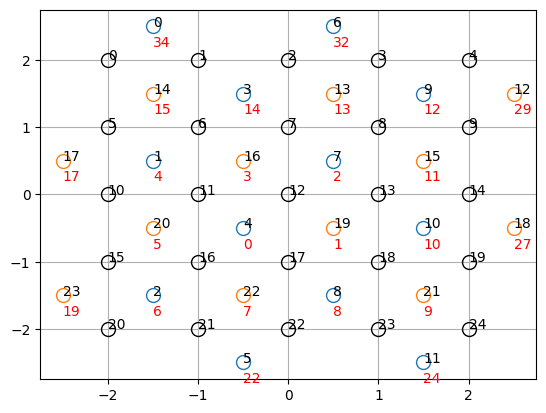

In [97]:
d = 5
q_list, sx_list, sz_list = idx_to_coord(d)
plotter(q_list,"k")
plotter(sx_list,"C0")
plotter(sz_list,"C1")
# # plotter(sz_list)
# plt.grid()

perm_mat = torch.zeros(d**2-1, dtype=torch.int32)
for idx in sx_list:
    plt.text(sx_list[idx][0],sx_list[idx][1]-0.3,f"{spiral[sx_list[idx]]}",color="red")
    perm_mat[int(idx)] = spiral[sx_list[idx]]
for idx in sz_list:
    plt.text(sz_list[idx][0],sz_list[idx][1]-0.3,f"{spiral[sz_list[idx]]}",color="red")
    perm_mat[int(idx)] = spiral[sz_list[idx]]
    # print(spiral[sx_list[idx]])

plt.grid()

print(perm_mat)

In [96]:
syndrome_new = np.copy(syndrome)
syndrome_new[(d**2-1)//2:] = 2*syndrome_new[(d**2-1)//2:]
print(syndrome_new)
syndrome_train = torch.zeros((d+1)**2, dtype = torch.int32 )
syndrome_train[perm_mat] = torch.tensor(syndrome_new.astype(np.int32))
print(syndrome_train)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 0. 2. 2. 2. 2.]
tensor([0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)


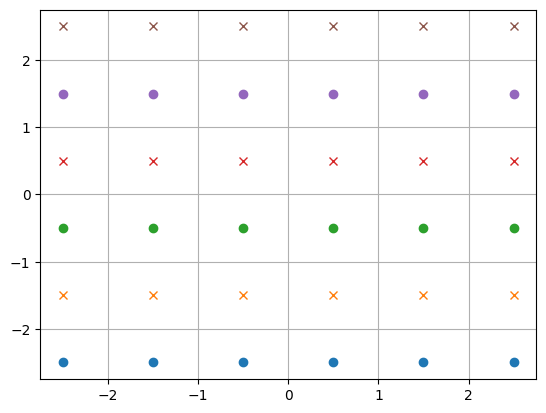

In [6]:
d = 5

x0 = -d/2
y0= -d/2
spiral = {}
counter = 0
for i in range(1, d+1, 2):
    x_vec = np.arange(x0,x0+d+1)
    y_vec = y0 + 0*np.arange(x0,x0+d+1)
    for x_coord in x_vec:
        spiral[(x_coord,y0)] = counter
        counter += 1
    plt.plot(x_vec,y_vec, "o")
    y0 += 1

    x_vec = np.arange(x0+d,x0-1,-1)
    y_vec = y0 + 0*np.arange(x0,x0+d+1)
    for x_coord in x_vec:
        spiral[(x_coord,y0)] = counter
        counter += 1
    plt.plot(x_vec,y_vec, "x")
    y0 += 1
plt.grid()


[34 22 10 26 14  2 32 20  8 28 16  4 29 27 25 19 21 23 17 15 13  7  9 11]


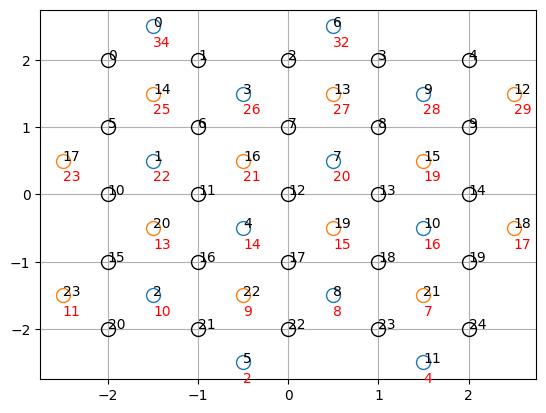

In [12]:
d = 5
q_list, sx_list, sz_list = idx_to_coord(d)
plotter(q_list,"k")
plotter(sx_list,"C0")
plotter(sz_list,"C1")
# # plotter(sz_list)
# plt.grid()

perm_mat = np.zeros(d**2-1, dtype=np.int32)
for idx in sx_list:
    plt.text(sx_list[idx][0],sx_list[idx][1]-0.3,f"{spiral[sx_list[idx]]}",color="red")
    perm_mat[int(idx)] = spiral[sx_list[idx]]
for idx in sz_list:
    plt.text(sz_list[idx][0],sz_list[idx][1]-0.3,f"{spiral[sz_list[idx]]}",color="red")
    perm_mat[int(idx)] = spiral[sz_list[idx]]
    # print(spiral[sx_list[idx]])

plt.grid()

print(perm_mat)

array([ 0.25      , -0.27142857, -0.57857143])

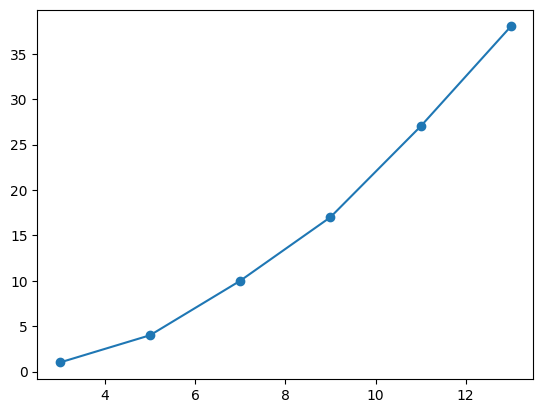

In [24]:
x = [3,5,7,9,11,13]
y = [1,4,10,17,27,38]
plt.plot(x,y,'o-')


In [122]:
# np.random.randint(0,10,4)
ids = np.arange(20)


In [133]:
np.random.shuffle(ids)
print(ids[:4])


[1 0 9 3]
